Para la ejecucion de esta estrategia, necesitamos implementar lo siguiente:
- Definir nivel de soporte y resitencia dentro de un rango determinado
- Ejecutar Trades, basados en quiebre de soporte o resistencia.

In [2]:
pip install ta yfinance

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf

# Identifica lo puntos maximos de un grupo de valores dentro de un rango
from scipy.signal import argrelextrema # Permite hacer calculos de los picos maximos, posteriormente serán los soportes y resistencias

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [7]:
# Data de YFinace
data = yf.download('AUDUSD=X', start = '2015-01-01', end = '2022-03-24')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,0.817127,0.817127,0.816993,0.817127,0.817127,0
2015-01-02,0.818197,0.818465,0.810373,0.817795,0.817795,0
2015-01-05,0.807363,0.810767,0.803859,0.806777,0.806777,0
2015-01-06,0.809520,0.815927,0.808865,0.809979,0.809979,0
2015-01-07,0.807885,0.808277,0.803729,0.808016,0.808016,0
...,...,...,...,...,...,...
2022-03-18,0.738160,0.741098,0.736279,0.738100,0.738100,0
2022-03-21,0.741021,0.742512,0.737490,0.740999,0.740999,0
2022-03-22,0.739459,0.745000,0.737580,0.739579,0.739579,0


In [25]:
puntos_de_comparacion = 50 # Cuantos puntos usaremos para comparar los picos

Buscaremos los ÍNDICES en el dataframe que contienen los valores picos MAXIMOS

In [26]:
picos_maximos = argrelextrema(data['Close'].values, np.greater_equal, order = puntos_de_comparacion)
picos_maximos # Retorno un Array con INDICES de los picos Maximos

(array([  12,   95,  340,  484,  578,  700,  800, 1020, 1183, 1302, 1475,
        1602, 1654, 1778, 1882]),)

Obteniendo un INDICE específico del array

In [27]:
picos_maximos[0][-2]

1778

Buscaremos los ÍNDICES en el dataframe que contienen los valores picos MINIMOS


In [28]:
picos_minimos = argrelextrema(data['Close'].values, np.less_equal, order = puntos_de_comparacion)
picos_minimos # Retorna un Array con INDICES de los Picos Minimos

(array([  66,  177,  272,  367,  517,  614,  765,  980, 1043, 1209, 1358,
        1519, 1622, 1729, 1844]),)

Ahora busquemos los VALORES REALES DE ESOS ÍNDICES y creemos nuevas columnas respectivamente.



In [32]:
# Primero necesitamos crear Columnas Vacias
data['picos_minimos'] = ''
data['picos_maximos'] = ''

# Aqui encontramos los valores de dichos indices
# order -> Es el rango en el cual esta calculando los picos minomos o maximos
data['picos_minimos'] = data['Close'].iloc[argrelextrema(data['Close'].values, np.less_equal, order = puntos_de_comparacion)]
data['picos_maximos'] = data['Close'].iloc[argrelextrema(data['Close'].values, np.greater_equal, order = puntos_de_comparacion)]

data

,Open,High,Low,Close,Adj Close,Volume,picos_minimos,picos_maximos
Date,,,,,,,,
2015-01-01,0.817127,0.817127,0.816993,0.817127,0.817127,0,NaN,NaN
2015-01-02,0.818197,0.818465,0.810373,0.817795,0.817795,0,NaN,NaN
2015-01-05,0.807363,0.810767,0.803859,0.806777,0.806777,0,NaN,NaN
2015-01-06,0.809520,0.815927,0.808865,0.809979,0.809979,0,NaN,NaN
2015-01-07,0.807885,0.808277,0.803729,0.808016,0.808016,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-03-18,0.738160,0.741098,0.736279,0.738100,0.738100,0,NaN,NaN
2022-03-21,0.741021,0.742512,0.737490,0.740999,0.740999,0,NaN,NaN
2022-03-22,0.739459,0.745000,0.737580,0.739579,0.739579,0,NaN,NaN


In [33]:
# Que tipo de data tenemos en una fila especifica
type(data['picos_maximos'].loc['2020-01-01'])

numpy.float64

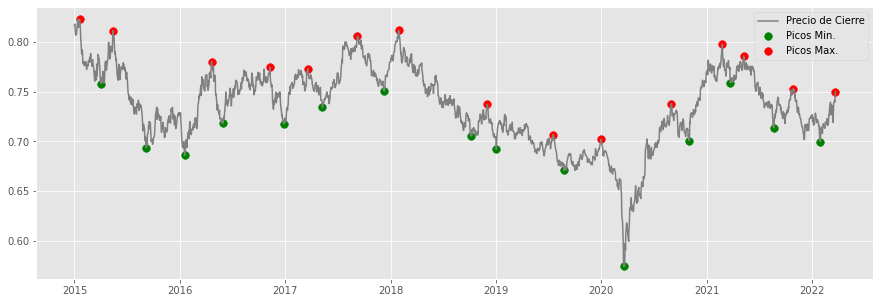

In [34]:
# Plot - Ver todo el dataframe, que se hayan establecido los picos minimos y maximos
plt.figure(figsize = (15, 5))
plt.plot(data.index, data['Close'], label = 'Precio de Cierre', color = 'grey')
plt.scatter(data.index, data['picos_minimos'], label = 'Picos Min.', color = 'green', s = 60) # s -> Tamaño de los marcadores
plt.scatter(data.index, data['picos_maximos'], label = 'Picos Max.', color = 'red', s = 60)
plt.legend()
plt.show()

# Encontrando el valor maximo de los picos

In [35]:
# Encuentra todos los picos dentro de ese rango
data['Close'].iloc[argrelextrema(data['Close'].values, np.less_equal, order = puntos_de_comparacion)]

Date
2015-04-03    0.758208
2015-09-07    0.693577
2016-01-18    0.686106
2016-05-30    0.718494
2016-12-26    0.717927
2017-05-10    0.734241
2017-12-11    0.750807
2018-10-08    0.705288
2019-01-03    0.691898
2019-08-26    0.670808
2020-03-20    0.574290
2020-11-02    0.700820
2021-03-25    0.759100
2021-08-23    0.713980
2022-01-31    0.699800
Name: Close, dtype: float64

In [40]:
# Encontrar el punto maximo de todos los resultados
data['Close'].iloc[argrelextrema(data['Close'].values, np.less_equal, order = puntos_de_comparacion)].max()

0.7591003179550171

In [41]:
# Encontrar el punto minimo de todos los resultados
data['Close'].iloc[argrelextrema(data['Close'].values, np.less_equal, order = puntos_de_comparacion)].min()

0.5742902159690857

## TesterBase Class *(parent)*

In [42]:
class TesterBase():
  def __init__(self, simbolo, data_origen, inicio, final, monto, usar_spread=True):
    self.simbolo = simbolo
    self.data_origen = data_origen 
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 
    self.trades = 0      
    self.posicion = 0
    self.usar_spread = usar_spread
    self.obtener_data()

  def obtener_data(self):
    if self.data_origen == "local":
      ruta_data = "<<<<<<<<<< RUTA A DATA LOCAL EN EL DRIVE >>>>>>>>>>>>>>"
      raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna() # Formatea data DUKASCOPY
      raw = raw.loc[self.inicio : self.final]
      self.data = raw

    if self.data_origen == "yahoo":
      raw = yf.download(self.simbolo, interval="1d", start=self.inicio, end=self.final)
      raw = raw.rename(columns = {'Close':'Precio'})

      # Comprueba si el dataframe tiene la columna 'Spread'. De lo contrario, 
      # crea una columna llamada "Spread" con valores 0
      if 'Spread' in raw.columns or 'spread' in raw.columns:
        self.data = raw
      else:
        raw['Spread'] = 0
        self.data = raw

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Precio'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, round(self.balance_actual, 2)))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio += spread/2 # Precio ASK
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual -= unidades_en_activos * precio 
    self.unidades_en_activos += unidades_en_activos
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio -= spread/2 # Precio BID 
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual += unidades_en_activos * precio 
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print("{} | Vendiendo: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_de_posicion_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    cpv = self.unidades_en_activos * precio
    print("{} | Valor de la posicion actual: {}".format(date, cpv))

  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    net_asset_value = self.balance_actual + (self.unidades_en_activos * precio)
    print("{} | Valor Neto Actual: {}".format(date, net_asset_value))

  def cerrar_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print(100 * "-")
    print("{} | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/". format(date))
    self.balance_actual += self.unidades_en_activos * precio 
    self.balance_actual -= (abs(self.unidades_en_activos) * (spread / 2) * self.usar_spread)
    print("{} | Cerrando posicion de: {} | por: {}".format(date, self.unidades_en_activos, precio))
    self.unidades_en_activos = 0 
    self.trades += 1
    perf = (self.balance_actual - self.balance_inicial) / self.balance_inicial * 100 
    self.imprimir_balance_actual(vela)
    print("{} | Rendimiento Neto (%): {}".format(date, round(perf, 2)))
    print("{} | Numero de Trades: {}".format(date, self.trades))
    print(100 * "-") 

  # Performance de la Estrategia
  def Medidores_de_Riesgo(self):
    df = self.data.copy().dropna()
    riskfree_rate = 0.022

    # Prepara los datos que son necesarios para el uso del metodo 'Medidores_de_Riesgo'
    df['instrumento_retornos']   = df['Precio'].pct_change()
    df['estrategia_retornos'] = df['Posicion'].shift(1) * df['instrumento_retornos']
    # df.dropna(inplace=True)
    df['instrumento_retornos_acum'] = df['instrumento_retornos'].cumsum().apply(np.exp)
    df['estrategia_retornos_acum'] = df['estrategia_retornos'].cumsum().apply(np.exp)

    # Performance Absoluto ----------------------------------------------------/
    perf = df['estrategia_retornos_acum'][-1] 
    # % Superado --------------------------------------------------------------/
    pct_superado = perf - df['instrumento_retornos_acum'][-1] 
    # CAGR --------------------------------------------------------------------/
    numero_de_anios = len(df)/252 
    CAGR = (df['estrategia_retornos_acum'][-1])**(1/numero_de_anios) -1 
    # Volatilidad Anual -------------------------------------------------------/
    vol = df['instrumento_retornos'].std()* np.sqrt(252) 
    # Sharpe Ratio ------------------------------------------------------------/
    sharpe_ratio = (CAGR - riskfree_rate) / vol
    # Sortino Ratio -----------------------------------------------------------/
    neg_vol = df[df['instrumento_retornos'] < 0]['instrumento_retornos'].std()* np.sqrt(252) 
    sortino_ratio = (CAGR - riskfree_rate) / neg_vol
    # MDD ---------------------------------------------------------------------/
    df['max_ret_acum'] = df['estrategia_retornos_acum'].cummax()
    df['drawdown']     = df['max_ret_acum'] - df['estrategia_retornos_acum']
    df['drawdown_pct'] = df['drawdown'] / df['max_ret_acum']
    mdd                = df['drawdown_pct'].max()
    # Calmar Ratio ------------------------------------------------------------/
    calmar = CAGR / mdd
    # Imprime los valores con su respectivo texto -----------------------------/
    print("RENDIMIENTO DE LA ESTRATEGIA")
    print("-" * 100)
    print("% Superado al Benchmark:__" + str(round((pct_superado*100), 2)) + "%")
    print("CAGR (Rendimiento Anual)__" + str(round((CAGR*100), 2)) + "%")
    print("Volatilidad Anual:________" + str(round((vol*100), 2)) + "%")
    print("Maximum Drawdown:_________" + str(round((mdd*100), 2)) + "%")
    print("Sharpe R._________________" + str(round(sharpe_ratio, 2)))
    print("Sortino R.________________" + str(round(sortino_ratio, 2)))
    print("Calmar R._________________" + str(round(calmar, 2)))
    print("-" * 100)

  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

## BacktesterIterativo *(child)*

In [43]:
class BacktesterIterativo(TesterBase):
  
  # Metodo ayuda Comprar
  def ir_long(self, vela, unidades_en_activos=None, monto=None):
    if self.posicion == -1: 
      self.comprar_instrumento(vela, unidades_en_activos= -self.unidades_en_activos) 
    if unidades_en_activos:
      self.comprar_instrumento(vela, unidades_en_activos= unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.comprar_instrumento(vela, monto=monto) # Ir Long

  # Metodo ayuda Vender
  def ir_short(self, vela, unidades_en_activos=None, monto=None):
    if self.posicion == 1: 
      self.vender_instrumento(vela, unidades_en_activos= self.unidades_en_activos)
    if unidades_en_activos:
      self.vender_instrumento(vela, unidades_en_activos = unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.vender_instrumento(vela, monto=monto) # Ir Short

  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA CRUCE SMA -------------------------------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_Cruce_SMAs(self, sma_rapida, sma_lenta, plot_graph=True):

    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cruce de SMAs | {} | sma_rapida: {} | sma_lenta: {}".format(self.simbolo, sma_rapida, sma_lenta)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data

    # Preparar datos (calcula las SMAs)
    from ta.trend import SMAIndicator

    # Al principio nombramos la nueva columna según el valor que se coloca en los parámetros SMAs
    self.data["SMA_R: "+str(sma_rapida)] = SMAIndicator(self.data['Precio'], sma_rapida, False).sma_indicator() 
    self.data["SMA_L: "+str(sma_lenta)]  = SMAIndicator(self.data['Precio'], sma_lenta, False).sma_indicator() 
    self.data.dropna(inplace=True)

    # Cruce de las SMAs 
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última vela

      # Senal para ir Long
      if self.data["SMA_R: "+str(sma_rapida)].iloc[vela] > self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
          self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
          self.posicion = 1 # Posicion Long 
          
          # Popula la columna 'posiciones' en cada loop (con señales de compra (1))          
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
      
      # Senal para ir Short
      elif self.data["SMA_R: "+str(sma_rapida)].iloc[vela] < self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
          self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
          self.posicion = -1 # Posicion Short 
          
          # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))
      ax1 = plt.subplot2grid((2,1), (1,0), rowspan=2, colspan=1)
      ax1.plot(self.data['Precio'], label="precio", color='black')
      ax1.plot(self.data["SMA_R: "+str(sma_rapida)], label = str(sma_rapida) + " periodos SMA")
      ax1.plot(self.data["SMA_L: "+str(sma_lenta)], label = str(sma_lenta) + " periodos SMA")
      # Plotea Trades en Long
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades en Short
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')

      plt.title(self.simbolo +"\n Estrategia Cruce SMAs "+str(sma_rapida)+ " - " +str(sma_lenta), fontsize = 20)
      plt.legend(fontsize = 15)
      plt.show()

  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA CRUCE RSI -------------------------------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_Cruce_RSI(self, sobrecomprado=70, sobrevendido=30, plot_graph=True):
    
    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cruce de RSI | {} | sobrecomprado: {} | sobrevendido: {}".format(self.simbolo, sobrecomprado, sobrevendido)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data
    
    # Preparar datos (calcula el RSI)
    from ta.momentum import rsi 
    self.data['RSI'] = rsi(self.data['Precio'], 14, False)

    # Cruce RSI 
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última

      # Senal para ir Long
      if self.data["RSI"].iloc[vela] < sobrevendido: 
        if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
          self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
          self.posicion = 1 # Posicion Long
          
          # Popula la columna 'posiciones' en cada loop (con señales de compra (1))          
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

      # Senal para ir Short
      elif self.data["RSI"].iloc[vela] > sobrecomprado:
        if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
          self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
          self.posicion = -1 # Posicion Short 

          # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))

      ax1 = plt.subplot2grid((9,1), (1,0), rowspan=4, colspan=1)
      ax1.plot(self.data['Precio'], color='black')      
      # Plotea Trades Long, en el Grafico del Precio
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades Short, en el Grafico del Precio
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')
      
      ax2 = plt.subplot2grid((9,1), (5,0), rowspan=2, colspan=1, sharex=ax1)
      ax2.plot(self.data['RSI'], color='orange')
      # Plotea Senales Long, en el Grafico RSI
      ax2.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['RSI'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Senales Short, en el Grafico RSI
      ax2.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['RSI'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')
      # Plotea lineas de referencia en el Grafico RSI
      ax2.axhline(70, color='red', linestyle='dotted', linewidth=2)
      ax2.axhline(30, color='green', linestyle='dotted', linewidth=2)
      ax2.set_yticks([30,70])
      ax2.set_title("RSI", loc='left')

      fig.suptitle(self.simbolo +"\n Estrategia Cruce RSI", fontsize = 20)
      plt.subplots_adjust(top=1.05, hspace=0)
      plt.show()
  
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA BOLLINGER BANDS con filtro SMAs ---------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_BB(self, BB_periodos=20, BB_std=2, sma_rapida=50, sma_lenta=200, plot_graph=True):
    
    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Bollinger Bands | Periodos: {} | Std: {}".format(self.simbolo, BB_periodos, BB_std)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data

    # Preparar datos (calcula las BBs y SMAs)
    from ta.volatility import BollingerBands
    from ta.trend import SMAIndicator

    BB = BollingerBands(self.data['Precio'], BB_periodos, BB_std, False)    
    self.data['BB-B. Alta']              = BB.bollinger_hband()
    self.data['BB-B. Baja']              = BB.bollinger_lband()
    self.data['BB-B. Media']             = BB.bollinger_mavg()
    self.data["SMA_R: "+str(sma_rapida)] = SMAIndicator(self.data['Precio'], sma_rapida, False).sma_indicator() 
    self.data["SMA_L: "+str(sma_lenta)]  = SMAIndicator(self.data['Precio'], sma_lenta, False).sma_indicator() 
    self.data.dropna(inplace=True)
        
    # Logica de la estrategia (Bandas Bollinger + filtro SMA)
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última vela
    
      # Filtro SMAs
      if self.data["SMA_R: "+str(sma_rapida)].iloc[vela] > self.data["SMA_L: "+str(sma_lenta)].iloc[vela]:
        if self.data["Price"].iloc[vela] < self.data["SMA_L: "+str(sma_lenta)].iloc[vela]:
          # Senal BB
          if self.data['Precio'].iloc[vela] <= self.data['BB-B. Media'].iloc[vela]:
            if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
              self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
              self.posicion = 1 # Posicion Long

              # Popula la columna 'posiciones' en cada loop (con señales de compra (1)) 
              self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
      
      # Filtro SMAs
      elif self.data["SMA_R: "+str(sma_rapida)].iloc[vela] < self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.data["Price"].iloc[vela] > self.data["SMA_L: "+str(sma_lenta)].iloc[vela]:
          # Senal BB
          if self.data['Precio'].iloc[vela] >= self.data['BB-B. Media'].iloc[vela]: 
            if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
              self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
              self.posicion = -1 # Posicion Short 

              # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
              self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
    
    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))
      ax1 = plt.subplot2grid((2,1), (1,0), rowspan=2, colspan=1)
      ax1.plot(self.data['Precio'], label="Precio", color='black')
      ax1.plot(self.data['BB-B. Alta'], color='black', ls='--')
      ax1.plot(self.data['BB-B. Baja'], color='black', ls='--')
      ax1.plot(self.data['BB-B. Media'], color='grey', ls='--')
      ax1.plot(self.data["SMA_R: "+str(sma_rapida)], label = str(sma_rapida) + " dias SMA")
      ax1.plot(self.data["SMA_L: "+str(sma_lenta)], label = str(sma_lenta) + " dias SMA")
      # Plotea Trades en Long
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades en Short
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')

      plt.title(self.simbolo +"\n Estrategia Bollinger Bands", fontsize = 20)
      plt.legend(fontsize = 15)
      plt.show()

  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA CAMBIO DE TENDENCIA (Picos) -------------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_Cambio_Tend_Picos(self, rango=50, puntos_de_comparacion=100, plot_graph=True):
    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cambio de Tendencia (Picos) | {} | Puntos de Comparacion: {}".format(self.simbolo, puntos_de_comparacion)
    print("-" * 100)
    print(stm)
    print("-" * 100)
    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data

    # Importa la libreria
    from scipy.signal import argrelextrema 
    
    # Prepara los datos 
    soporte = ""
    resistencia = ""
       
    # Cambio de Tendencia
    self.data['Posicion'] = 0 
    for vela in range(len(self.data)-1):

      # Iterar (no por periodo) por rangos
      df_aux = pd.DataFrame
      # El inicio de este nuevo dataframe auxiliar va ser donde este la vela inicial menos el rango
      df_aux = self.data.iloc[vela-rango : vela]
      soporte     = df_aux['Precio'].iloc[argrelextrema(df_aux['Precio'].values, np.less_equal, order=puntos_de_comparacion)].min()
      resistencia = df_aux['Precio'].iloc[argrelextrema(df_aux['Precio'].values, np.greater_equal, order=puntos_de_comparacion)].max()

      # Senal ir Long (Precio quiebra el soporte)
      # Verifica que se haya realizado el cruce - Tomando el dia anterior y dia actual
      if self.data['Precio'].iloc[vela-1] > soporte and self.data['Precio'].iloc[vela] <= soporte:
        
        if self.posicion in [0, -1]: 
              self.ir_long(vela, monto = 'todo') 
              self.posicion = 1 
              self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

      # Senal ir Short (Precio quiebra la resistencia)
      # Verifica que se haya realizado el cruce - Tomando el dia anterior y dia actual
      elif self.data['Precio'].iloc[vela-1] < resistencia and self.data['Precio'].iloc[vela] >= resistencia: 
        
        if self.posicion in [0, 1]: 
              self.ir_short(vela, monto = 'todo') 
              self.posicion = -1 
              self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
    
    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))
      ax1 = plt.subplot2grid((9,1), (1,0), rowspan=4, colspan=1)
      ax1.plot(self.data['Precio'], color='grey')      
      # Plotea Trades en Long
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades en Short
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')
      
      plt.title(self.simbolo +"\n Estrategia Cambio de Tendencia (Picos)", fontsize = 20)
      plt.legend(fontsize = 15)
      plt.show()

In [48]:
# Obteniendo la data de origen "local"
# bkbase = BacktesterIterativo("EURUSD", "local", "2006-12-31", "2020-06-30", 100000, usar_spread=False)

# Obteniendo la data de origen "yahoo" - FOREX
bkbase = BacktesterIterativo("AUDUSD=X", "yahoo", "2015-01-01", "2022-03-24", 100000, usar_spread=False)

# Obteniendo la data de origen "yahoo" - STOCKS
# bkbase = BacktesterIterativo("TSLA", "yahoo", "2015-01-01", "2020-01-01", 100000, usar_spread=False)

[*********************100%***********************]  1 of 1 completed


In [49]:
bkbase.data.head(2)

,Open,High,Low,Precio,Adj Close,Volume,Spread
Date,,,,,,,
2015-01-01,0.817127,0.817127,0.816993,0.817127,0.817127,0,0
2015-01-02,0.818197,0.818465,0.810373,0.817795,0.817795,0,0


----------------------------------------------------------------------------------------------------
TESTANDO LA ESTRATEGIA: Cambio de Tendencia (Picos) | AUDUSD=X | Puntos de Comparacion: 90
----------------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
2015-04-03 | Comprando: 131889, AUDUSD=X, por: 0.75821
2015-04-29 | Vendiendo: 131889, AUDUSD=X, por: 0.79968
2015-04-29 | Vendiendo: 131889, AUDUSD=X, por: 0.79968
2015-07-06 | Comprando: 131889, AUDUSD=X, por: 0.74845
2015-07-06 | Comprando: 149944, AUDUSD=X, por: 0.74845
2016-03-04 | Vendiendo: 149944, AUDUSD=X, por: 0.73578
2016-03-04 | Vendiendo: 149944, AUDUSD=X, por: 0.73578
2016-05-30 | Comprando: 149944, AUDUSD=X, por: 0.71849
2016-05-30 | Comprando: 157161, AUDUSD=X, por: 0.71849
2016-08-05 | Vendiendo: 157161, AUDUSD=X, por: 0.764
2016-08-05 | Vendiendo: 157161, AUDUSD=X, por: 0.764
2016-11-18 | Comprando: 157161, AUDUS

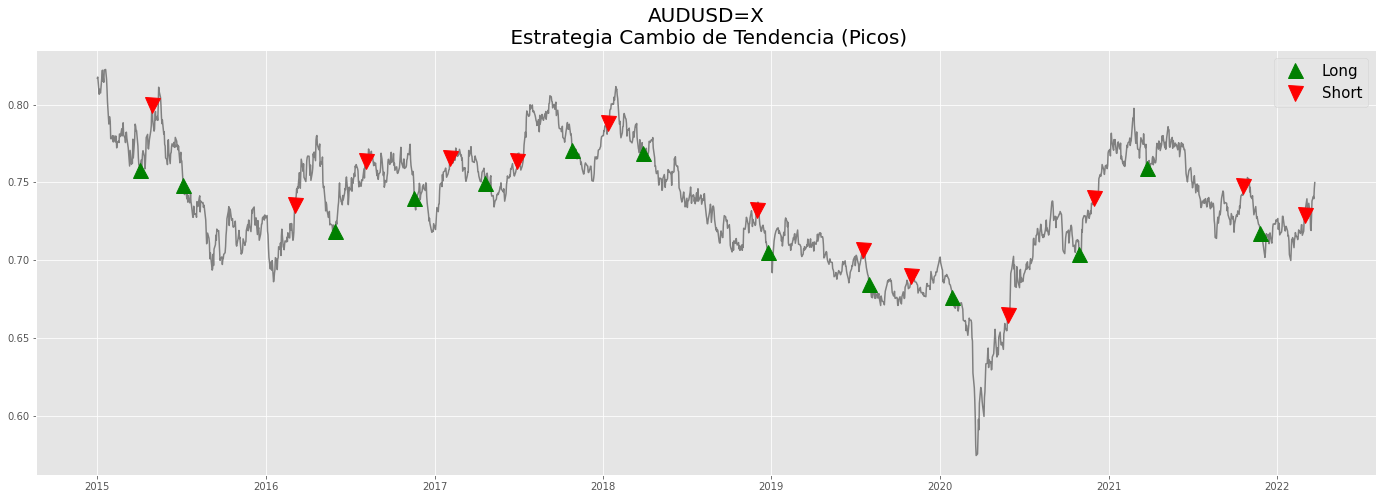

In [50]:
bkbase.Estrategia_Cambio_Tend_Picos(rango = 60, puntos_de_comparacion = 90)